In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs, load_iris
from sklearn.decomposition import PCA as SklearnPCA
from sklearn.cluster import KMeans as SklearnKMeans
from itertools import permutations
import time
import sklearn


## Part 1: Eigenvalue Calculations (Practice)

Before using NumPy, let's practice calculating eigenvalues and eigenvectors manually to deepen our understanding.

**Example 1: Simple 2×2 Matrix**

Consider the matrix: $\mathbf{A} = \begin{bmatrix} 4 & 2 \\ 1 & 3 \end{bmatrix}$

**Step 1: Find the characteristic polynomial**
$$\det(\mathbf{A} - \lambda\mathbf{I}) = \det\begin{bmatrix} 4-\lambda & 2 \\ 1 & 3-\lambda \end{bmatrix}$$

$$= (4-\lambda)(3-\lambda) - (2)(1) = \lambda^2 - 7\lambda + 10$$

**Step 2: Solve for eigenvalues**
$$\lambda^2 - 7\lambda + 10 = 0$$
$$(\lambda - 5)(\lambda - 2) = 0$$

Therefore: $\lambda_1 = 5, \lambda_2 = 2$

**Step 3: Find eigenvectors**

For $\lambda_1 = 5$:
$$(\mathbf{A} - 5\mathbf{I})\mathbf{v} = \mathbf{0}$$
$$\begin{bmatrix} -1 & 2 \\ 1 & -2 \end{bmatrix}\begin{bmatrix} v_1 \\ v_2 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$$

This gives us: $-v_1 + 2v_2 = 0 \Rightarrow v_1 = 2v_2$

Choosing $v_2 = 1$: $\mathbf{v_1} = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$

For $\lambda_2 = 2$:
$$(\mathbf{A} - 2\mathbf{I})\mathbf{v} = \mathbf{0}$$
$$\begin{bmatrix} 2 & 2 \\ 1 & 1 \end{bmatrix}\begin{bmatrix} v_1 \\ v_2 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$$

This gives us: $2v_1 + 2v_2 = 0 \Rightarrow v_1 = -v_2$

Choosing $v_2 = 1$: $\mathbf{v_2} = \begin{bmatrix} -1 \\ 1 \end{bmatrix}$



In [2]:
# Verification of Manual Calculations

def verify_manual_calculation():
    """
    Let's verify our manual calculations with NumPy and visualize the results.
    """
    print("VERIFYING MANUAL EIGENVALUE CALCULATIONS")
    print("=" * 50)
    
    # Example matrix from the theory
    A = np.array([[4, 2], 
                  [1, 3]])
    
    print("Matrix A:")
    print(A)
    
    # Calculate using NumPy
    eigenvals_A, eigenvecs_A = np.linalg.eig(A)
    
    print(f"\nNumPy Results for Matrix A:")
    print(f"Eigenvalues: {eigenvals_A}")
    print(f"Our manual calculation: [5, 2]")
    
    print(f"\nEigenvectors:")
    print(eigenvecs_A)
    
matrices_results = verify_manual_calculation()


VERIFYING MANUAL EIGENVALUE CALCULATIONS
Matrix A:
[[4 2]
 [1 3]]

NumPy Results for Matrix A:
Eigenvalues: [5. 2.]
Our manual calculation: [5, 2]

Eigenvectors:
[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


## Part 2: Understanding Covariance and Data Relationships

### What is Covariance?

**Covariance** measures how two variables change together. It's fundamental to understanding PCA.

**Mathematical Definition:**
For two variables $X$ and $Y$ with means $\mu_X$ and $\mu_Y$:

$$\text{Cov}(X,Y) = \mathbb{E}[(X - \mu_X)(Y - \mu_Y)] = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \mu_X)(y_i - \mu_Y)$$

**Interpretation:**
- **Positive covariance**: Variables tend to increase together
- **Negative covariance**: One increases while the other decreases  
- **Zero covariance**: Variables are uncorrelated

**Covariance Matrix:**
For a dataset with $d$ features, the covariance matrix is $d \times d$:

$$\mathbf{C} = \begin{bmatrix} 
\text{Var}(X_1) & \text{Cov}(X_1,X_2) & \cdots & \text{Cov}(X_1,X_d) \\
\text{Cov}(X_2,X_1) & \text{Var}(X_2) & \cdots & \text{Cov}(X_2,X_d) \\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}(X_d,X_1) & \text{Cov}(X_d,X_2) & \cdots & \text{Var}(X_d)
\end{bmatrix}$$

**Key Properties:**
- **Diagonal elements**: Variances of individual features
- **Off-diagonal elements**: Covariances between feature pairs
- **Symmetric matrix**: $\text{Cov}(X_i,X_j) = \text{Cov}(X_j,X_i)$
- **Positive semi-definite**: All eigenvalues ≥ 0

### Manual Calculation Example

**Dataset:** Three 2D points: $(1,1)$, $(2,3)$, $(3,2)$

**Step 1: Calculate means**
$$\mu_x = \frac{1+2+3}{3} = 2, \quad \mu_y = \frac{1+3+2}{3} = 2$$

**Step 2: Center the data**
$$\text{Centered data: } (-1,-1), (0,1), (1,0)$$

**Step 3: Calculate covariance matrix**
$$\text{Var}(X) = \frac{(-1)^2 + 0^2 + 1^2}{3-1} = \frac{2}{2} = 1$$

$$\text{Var}(Y) = \frac{(-1)^2 + 1^2 + 0^2}{3-1} = \frac{2}{2} = 1$$

$$\text{Cov}(X,Y) = \frac{(-1)(-1) + (0)(1) + (1)(0)}{3-1} = \frac{1}{2} = 0.5$$

**Result:** $\mathbf{C} = \begin{bmatrix} 1.0 & 0.5 \\ 0.5 & 1.0 \end{bmatrix}$


Dataset (3 points in 2D):
[[1 1]
 [2 3]
 [3 2]]
Mean of X: 2.0
Mean of Y: 2.0

Centered data:
[[-1. -1.]
 [ 0.  1.]
 [ 1.  0.]]

Covariance Matrix:
[[1.  0.5]
 [0.5 1. ]]


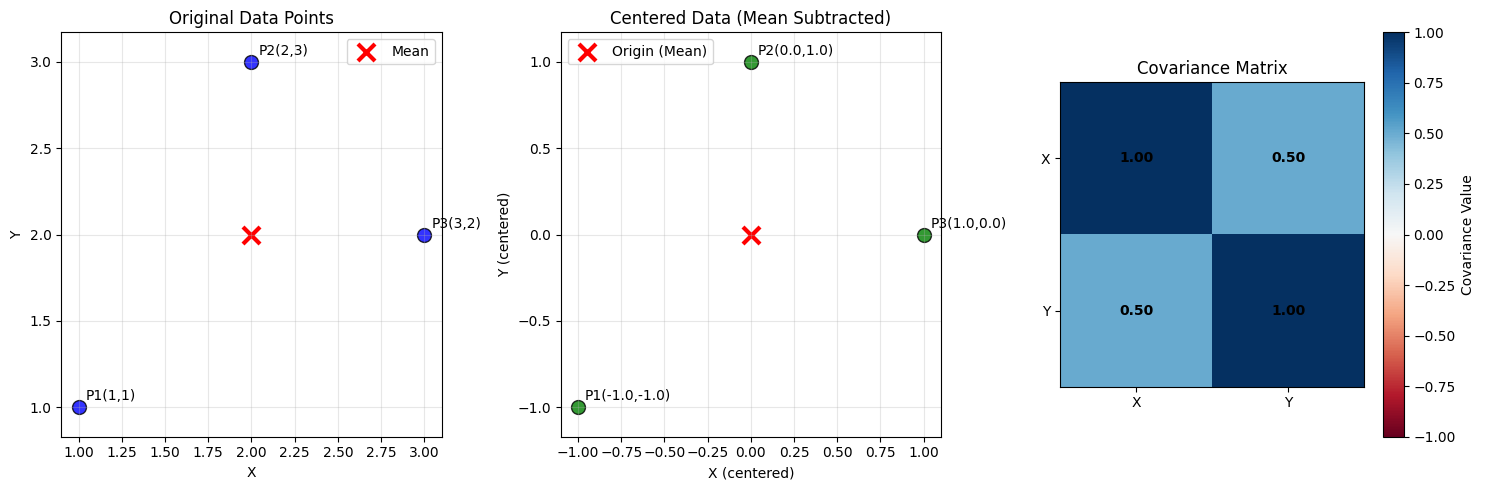

In [3]:
def covariance_calculation_exercise():
    # Example dataset: 3 points in 2D
    data_points = np.array([[1, 1],
                           [2, 3], 
                           [3, 2]])
    
    print("Dataset (3 points in 2D):")
    print(data_points)
    
    # Step 1: Calculate means
    mean_x = np.mean(data_points[:, 0])
    mean_y = np.mean(data_points[:, 1])
    print(f"Mean of X: {mean_x}")
    print(f"Mean of Y: {mean_y}")
    
    # Step 2: Center the data
    centered_data = data_points - np.array([mean_x, mean_y])
    print(f"\nCentered data:")
    print(centered_data)
    
    # Step 3: Calculate variances and covariance manually
    n = len(data_points)
    
    var_x = np.sum(centered_data[:, 0]**2) / (n - 1)
    var_y = np.sum(centered_data[:, 1]**2) / (n - 1)
    cov_xy = np.sum(centered_data[:, 0] * centered_data[:, 1]) / (n - 1)
    
    manual_cov_matrix = np.array([[var_x, cov_xy],
                                  [cov_xy, var_y]])
    
    print(f"\nCovariance Matrix:")
    print(manual_cov_matrix)
    
    # Visualization
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Original data
    plt.subplot(1, 3, 1)
    plt.scatter(data_points[:, 0], data_points[:, 1], c='blue', s=100, alpha=0.8, edgecolor='black')
    plt.scatter(mean_x, mean_y, c='red', s=150, marker='x', linewidth=3, label='Mean')
    
    # Add point labels
    for i, (x, y) in enumerate(data_points):
        plt.annotate(f'P{i+1}({x},{y})', (x, y), xytext=(5, 5), textcoords='offset points')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Original Data Points')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    
    # Plot 2: Centered data
    plt.subplot(1, 3, 2)
    plt.scatter(centered_data[:, 0], centered_data[:, 1], c='green', s=100, alpha=0.8, edgecolor='black')
    plt.scatter(0, 0, c='red', s=150, marker='x', linewidth=3, label='Origin (Mean)')
    
    # Add point labels
    for i, (x, y) in enumerate(centered_data):
        plt.annotate(f'P{i+1}({x:.1f},{y:.1f})', (x, y), xytext=(5, 5), textcoords='offset points')
    
    plt.xlabel('X (centered)')
    plt.ylabel('Y (centered)')
    plt.title('Centered Data (Mean Subtracted)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    
    # Plot 3: Covariance matrix heatmap
    plt.subplot(1, 3, 3)
    im = plt.imshow(manual_cov_matrix, cmap='RdBu', vmin=-1, vmax=1)
    plt.colorbar(im, label='Covariance Value')
    
    # Add text annotations
    for i in range(2):
        for j in range(2):
            text = plt.text(j, i, f'{manual_cov_matrix[i, j]:.2f}',
                           ha="center", va="center", color="black", fontweight='bold')
    
    plt.xticks([0, 1], ['X', 'Y'])
    plt.yticks([0, 1], ['X', 'Y'])
    plt.title('Covariance Matrix')
    
    plt.tight_layout()
    plt.show()
    

    
    return data_points, manual_cov_matrix

# Run the exercise
exercise_results = covariance_calculation_exercise()


## Part 3: Principal Component Analysis (PCA) - Deep Theory

### The Big Picture: Why PCA?

**Problem:** Real-world data is often high-dimensional and contains redundancy.
- Images: Thousands of pixels, but many are correlated
- Genomics: Tens of thousands of genes, many with similar expression patterns
- Finance: Hundreds of stock prices, many move together

**Solution:** PCA finds the most important directions (principal components) in the data.

### Mathematical Foundation of PCA

**Core Idea:** Find new coordinate axes (principal components) such that:
1. **1st PC**: Direction of maximum variance
2. **2nd PC**: Direction of maximum remaining variance (orthogonal to 1st PC)
3. **3rd PC**: Direction of maximum remaining variance (orthogonal to 1st and 2nd PC)
4. And so on...

### Step-by-Step PCA Algorithm

**Input:** Data matrix $\mathbf{X} \in \mathbb{R}^{n \times d}$ (n samples, d features)

**Step 1: Standardize the data**
$$\mathbf{X}_{std} = \frac{\mathbf{X} - \boldsymbol{\mu}}{\boldsymbol{\sigma}}$$

where $\boldsymbol{\mu}$ is the mean vector and $\boldsymbol{\sigma}$ is the standard deviation vector.

**Step 2: Compute covariance matrix**
$$\mathbf{C} = \frac{1}{n-1}\mathbf{X}_{std}^T\mathbf{X}_{std}$$

**Step 3: Find eigenvalues and eigenvectors**
$$\mathbf{C}\mathbf{v}_i = \lambda_i\mathbf{v}_i$$

**Step 4: Sort by eigenvalue magnitude**
$$\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_d \geq 0$$

**Step 5: Select top k components**
$$\mathbf{W} = [\mathbf{v}_1, \mathbf{v}_2, \ldots, \mathbf{v}_k] \in \mathbb{R}^{d \times k}$$

**Step 6: Transform data**
$$\mathbf{Y} = \mathbf{X}_{std}\mathbf{W} \in \mathbb{R}^{n \times k}$$

### Key PCA Properties

**1. Variance Maximization**
- 1st PC captures maximum variance possible in any single direction
- Each subsequent PC captures maximum remaining variance

**2. Orthogonality**
- All principal components are orthogonal (uncorrelated)
- $\mathbf{v}_i^T\mathbf{v}_j = 0$ for $i \neq j$

**3. Variance Explanation**
- Eigenvalue $\lambda_i$ = variance along PC $i$
- Explained variance ratio: $\frac{\lambda_i}{\sum_j \lambda_j}$

**4. Dimensionality Reduction**
- Keep only top $k < d$ components
- Retain most important information while reducing dimensions

### Geometric Interpretation

**Original Space:** Data lives in $\mathbb{R}^d$
**PC Space:** Data projected onto $\mathbb{R}^k$ where $k < d$

The principal components form a new coordinate system that:
- **Aligns with data's natural structure**
- **Maximizes information retention**
- **Minimizes information loss**




## Implementing PCA from Scratch (Exercise)

### Your Task

Complete the `MyPCA` class implementation below. This exercise will help you understand the mathematical foundations of PCA by implementing each step from scratch.

**What you need to implement:**
1. Data standardization
2. Covariance matrix computation
3. Eigenvalue decomposition
4. Component selection and transformation
5. Explained variance calculation

**Key Implementation Points:**
- **Standardization**: $(X - \mu) / \sigma$ for each feature
- **Covariance**: $C = \frac{1}{n-1}X^T X$ for centered data
- **Eigendecomposition**: Find eigenvalues and eigenvectors of covariance matrix
- **Sorting**: Order components by decreasing eigenvalue magnitude
- **Transformation**: Project data onto selected principal components


In [4]:
# class MyPCA:
#     """
#     Principal Component Analysis implementation from scratch.
    
#     This class demonstrates the mathematical foundations of PCA using eigenvalue decomposition.
#     Students should complete the missing implementations marked with TODO.
#     """
    
#     def __init__(self, n_components):
#         """
#         Initialize PCA with specified number of components.
        
#         Parameters:
#         -----------
#         n_components : int
#             Number of principal components to keep
#         """
#         self.n_components = n_components
#         self.components = None                              # Principal components (eigenvectors)
#         self.mean = None                                    # Feature means for centering
#         self.std = None                                     # Feature standard deviations for scaling
#         self.explained_variance_ratio_ = None               # Proportion of variance explained by each component
#         self.cumulative_explained_variance_ratio_ = None    # Cumulative explained variance

#     def fit(self, X):
#         """
#         Fit PCA model to the data.
        
#         Parameters:
#         -----------
#         X : numpy.ndarray
#             Input data of shape (n_samples, n_features)
            
#         Returns:
#         --------
#         self : MyPCA
#             Fitted PCA object
#         """
#         # Convert to float to avoid integer division issues
#         X = X.astype(float)
#         n_samples, n_features = X.shape
        
#         #  TODO 1: Compute mean and standard deviation for each feature
#         # Hint: Use np.mean() and np.std() along axis=0
#         self.mean = #___FILL IN HERE___  # Replace with: np.mean(X, axis=0)
#         self.std = #___FILL IN HERE___   # Replace with: np.std(X, axis=0)
        
#         #  TODO 2: Standardize the data: (X - mean) / std
#         # This centers the data and scales to unit variance
#         X_standardized = #___FILL IN HERE___  # Replace with: (X - self.mean) / self.std
        
#         #  TODO 3: Compute the covariance matrix
#         # For standardized data: C = (1/(n-1)) * X^T * X
#         # Hint: Use np.cov() with rowvar=False, or implement manually
#         cov_matrix = #___FILL IN HERE___  # Replace with: np.cov(X_standardized.T)
        
#         #  TODO 4: Perform eigenvalue decomposition
#         # Hint: Use np.linalg.eig() to get eigenvalues and eigenvectors
#         eigenvalues, eigenvectors = #___FILL IN HERE___, #___FILL IN HERE___  # Replace with: np.linalg.eig(cov_matrix)
        
#         #  TODO 5: Sort eigenvalues and eigenvectors in descending order
#         # Hint: Use np.argsort()[::-1] to get indices for descending sort
#         sorted_indices = #___FILL IN HERE___        # Replace with: np.argsort(eigenvalues.real)[::-1]
#         sorted_eigenvalues = #___FILL IN HERE___    # Replace with: eigenvalues.real[sorted_indices]
#         sorted_eigenvectors = #___FILL IN HERE___   # Replace with: eigenvectors[:, sorted_indices].real
        
#         #  TODO 6: Select the top n_components
#         # Store the principal components (eigenvectors)
#         self.components = #___FILL IN HERE___  # Replace with: sorted_eigenvectors[:, :self.n_components]
        
#         #  TODO 7: Calculate explained variance ratio
#         # This shows how much variance each component explains
#         total_eigenvalues = #___FILL IN HERE___  # Replace with: np.sum(sorted_eigenvalues)
#         if total_eigenvalues == 0:
#             self.explained_variance_ratio_ = np.zeros(self.n_components)
#         else:
#             self.explained_variance_ratio_ = #___FILL IN HERE___  # Replace with: sorted_eigenvalues[:self.n_components] / total_eigenvalues
            
#         #  TODO 8: Calculate cumulative explained variance ratio
#         # Hint: Use np.cumsum()
#         self.cumulative_explained_variance_ratio_ = #___FILL IN HERE___  # Replace with: np.cumsum(self.explained_variance_ratio_)
        
#         return self

#     def transform(self, X):
#         """
#         Transform data to principal component space.
        
#         Parameters:
#         -----------
#         X : numpy.ndarray
#             Data to transform of shape (n_samples, n_features)
            
#         Returns:
#         --------
#         X_transformed : numpy.ndarray
#             Transformed data of shape (n_samples, n_components)
#         """
#         # Convert to float
#         X = X.astype(float)
        
#         #  TODO 9: Standardize the data using fitted mean and std
#         # Use the same standardization as during fit
#         X_standardized = #___FILL IN HERE___  # Replace with: (X - self.mean) / self.std
        
#         #  TODO 10: Project data onto principal components
#         # Matrix multiplication: X_standardized @ self.components
#         X_pca = #___FILL IN HERE___  # Replace with: np.dot(X_standardized, self.components)
        
#         return X_pca

#     def fit_transform(self, X):
#         """
#         Fit PCA and transform data in one step.
        
#         Parameters:
#         -----------
#         X : numpy.ndarray
#             Input data
            
#         Returns:
#         --------
#         X_transformed : numpy.ndarray
#             Transformed data
#         """
#         return self.fit(X).transform(X)


In [5]:
class MyPCA:
    """
    Principal Component Analysis implementation from scratch.
    
    This class demonstrates the mathematical foundations of PCA using eigenvalue decomposition.
    Students should complete the missing implementations marked with TODO.
    """
    
    def __init__(self, n_components):
        """
        Initialize PCA with specified number of components.
        
        Parameters:
        -----------
        n_components : int
            Number of principal components to keep
        """
        self.n_components = n_components
        self.components = None                              # Principal components (eigenvectors)
        self.mean = None                                    # Feature means for centering
        self.std = None                                     # Feature standard deviations for scaling
        self.explained_variance_ratio_ = None               # Proportion of variance explained by each component
        self.cumulative_explained_variance_ratio_ = None    # Cumulative explained variance

    def fit(self, X):
        """
        Fit PCA model to the data.
        
        Parameters:
        -----------
        X : numpy.ndarray
            Input data of shape (n_samples, n_features)
            
        Returns:
        --------
        self : MyPCA
            Fitted PCA object
        """
        # Convert to float to avoid integer division issues
        X = X.astype(float)
        n_samples, n_features = X.shape
        
        # TODO 1: Compute mean and standard deviation for each feature
        # Hint: Use np.mean() and np.std() along axis=0
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        
        # TODO 2: Standardize the data: (X - mean) / std
        # This centers the data and scales to unit variance
        X_standardized = (X - self.mean) / self.std
        
        # TODO 3: Compute the covariance matrix
        # For standardized data: C = (1/(n-1)) * X^T * X
        # Hint: Use np.cov() with rowvar=False, or implement manually
        cov_matrix = np.cov(X_standardized.T)
        
        # TODO 4: Perform eigenvalue decomposition
        # Hint: Use np.linalg.eig() to get eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        
        # TODO 5: Sort eigenvalues and eigenvectors in descending order
        # Hint: Use np.argsort()[::-1] to get indices for descending sort
        sorted_indices = np.argsort(eigenvalues.real)[::-1]
        sorted_eigenvalues = eigenvalues.real[sorted_indices]
        sorted_eigenvectors = eigenvectors[:, sorted_indices].real
        
        # TODO 6: Select the top n_components
        # Store the principal components (eigenvectors)
        self.components = sorted_eigenvectors[:, :self.n_components]
        
        # TODO 7: Calculate explained variance ratio
        # This shows how much variance each component explains
        total_eigenvalues = np.sum(sorted_eigenvalues)
        if total_eigenvalues == 0:
            self.explained_variance_ratio_ = np.zeros(self.n_components)
        else:
            self.explained_variance_ratio_ = sorted_eigenvalues[:self.n_components] / total_eigenvalues
            
        # TODO 8: Calculate cumulative explained variance ratio
        # Hint: Use np.cumsum()
        self.cumulative_explained_variance_ratio_ = np.cumsum(self.explained_variance_ratio_)
        
        return self

    def transform(self, X):
        """
        Transform data to principal component space.
        
        Parameters:
        -----------
        X : numpy.ndarray
            Data to transform of shape (n_samples, n_features)
            
        Returns:
        --------
        X_transformed : numpy.ndarray
            Transformed data of shape (n_samples, n_components)
        """
        # Convert to float
        X = X.astype(float)
        
        # TODO 9: Standardize the data using fitted mean and std
        # Use the same standardization as during fit
        X_standardized = (X - self.mean) / self.std
        
        # TODO 10: Project data onto principal components
        # Matrix multiplication: X_standardized @ self.components
        X_pca = np.dot(X_standardized, self.components)
        
        return X_pca

    def fit_transform(self, X):
        """
        Fit PCA and transform data in one step.
        
        Parameters:
        -----------
        X : numpy.ndarray
            Input data
            
        Returns:
        --------
        X_transformed : numpy.ndarray
            Transformed data
        """
        return self.fit(X).transform(X)




## Part 4: K-Means Clustering - Mathematical Foundations

### What is Clustering?

**Clustering** is the task of grouping similar data points together without knowing the true labels beforehand. It's an **unsupervised learning** problem.

**Goal:** Partition $n$ data points into $k$ clusters such that:
- Points within the same cluster are similar
- Points in different clusters are dissimilar

### K-Means Algorithm: Mathematical Formulation

**Objective Function:** Minimize within-cluster sum of squares (WCSS)

$$J = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2$$

where:
- $C_i$ = set of points in cluster $i$
- $\mu_i$ = centroid (mean) of cluster $i$
- $k$ = number of clusters

### Step-by-Step K-Means Algorithm

**Input:** Dataset $\mathbf{X} = \{x_1, x_2, \ldots, x_n\}$, number of clusters $k$

**Initialize:** Choose initial centroids $\{\mu_1, \mu_2, \ldots, \mu_k\}$

**Repeat until convergence:**

**Step 1: Assignment** - Assign each point to nearest centroid
$$c_i = \arg\min_j ||x_i - \mu_j||^2$$

**Step 2: Update** - Recalculate centroids
$$\mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i$$

**Stop when:** Centroids don't change significantly or max iterations reached

### Mathematical Guarantees

**1. Convergence:** K-Means always converges
- WCSS decreases with each iteration
- Number of possible partitions is finite

**2. Local Optimum:** May not find global minimum
- Solution depends on initialization
- Multiple runs with different initializations recommended

**3. Computational Complexity:** $O(tknd)$
- $t$ = number of iterations
- $k$ = number of clusters  
- $n$ = number of data points
- $d$ = number of dimensions

### Distance Metrics

**1. Euclidean Distance (most common)**
$$d(x, \mu) = \sqrt{\sum_{i=1}^{d}(x_i - \mu_i)^2}$$

**2. Manhattan Distance**
$$d(x, \mu) = \sum_{i=1}^{d}|x_i - \mu_i|$$

**3. Squared Euclidean Distance (for efficiency)**
$$d^2(x, \mu) = \sum_{i=1}^{d}(x_i - \mu_i)^2$$

### Initialization Strategies

**1. Random Initialization**
- Randomly select $k$ data points as initial centroids
- Simple but may lead to poor results

**2. K-Means++**
- Choose initial centroids to be far apart
- Improves convergence and final result quality

**3. Multiple Random Starts**
- Run K-Means multiple times with different initializations
- Select best result (lowest WCSS)

### Assumptions and Limitations

**Assumptions:**
- Clusters are spherical (round)
- Clusters have similar sizes
- Clusters have similar densities

**Limitations:**
- Need to specify $k$ beforehand
- Sensitive to outliers
- Struggles with non-spherical clusters
- May converge to local minima

### Connection to Linear Algebra

**Centroid Calculation:**
$$\mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i$$

This is computing the **mean vector** of points in cluster $j$.

**Distance Calculation:**
$$||x - \mu||^2 = (x - \mu)^T(x - \mu)$$

This uses the **Euclidean norm** (L2 norm) from linear algebra.

**Why PCA + K-Means Works Well:**
1. **PCA removes noise** and focuses on main variations
2. **Reduced dimensions** make K-Means faster and more stable
3. **Principal components** often align with natural cluster directions
4. **Visualization** becomes possible in 2D/3D


## K-Means Manual Calculation Example

### Step-by-Step Manual K-Means

Let's work through a simple K-Means example by hand to understand the algorithm.

**Dataset:** 6 points in 2D space
- $A = (1, 1)$
- $B = (1.5, 2)$ 
- $C = (3, 4)$
- $D = (5, 7)$
- $E = (3.5, 5)$
- $F = (4.5, 5)$

**Goal:** Cluster into $k = 2$ groups

### Iteration 0: Initialization

**Choose initial centroids:**
- $\mu_1^{(0)} = (2, 2)$ (randomly chosen)
- $\mu_2^{(0)} = (4, 6)$ (randomly chosen)

### Iteration 1: Assignment Step

**Calculate distances from each point to each centroid:**

**Point A = (1, 1):**
- $d(A, \mu_1) = \sqrt{(1-2)^2 + (1-2)^2} = \sqrt{1 + 1} = \sqrt{2} = 1.41$
- $d(A, \mu_2) = \sqrt{(1-4)^2 + (1-6)^2} = \sqrt{9 + 25} = \sqrt{34} = 5.83$
- **Assign A to Cluster 1** (closer to $\mu_1$)

**Point B = (1.5, 2):**
- $d(B, \mu_1) = \sqrt{(1.5-2)^2 + (2-2)^2} = \sqrt{0.25 + 0} = 0.5$
- $d(B, \mu_2) = \sqrt{(1.5-4)^2 + (2-6)^2} = \sqrt{6.25 + 16} = \sqrt{22.25} = 4.72$
- **Assign B to Cluster 1**

**Point C = (3, 4):**
- $d(C, \mu_1) = \sqrt{(3-2)^2 + (4-2)^2} = \sqrt{1 + 4} = \sqrt{5} = 2.24$
- $d(C, \mu_2) = \sqrt{(3-4)^2 + (4-6)^2} = \sqrt{1 + 4} = \sqrt{5} = 2.24$
- **Tie! Assign C to Cluster 1** (by convention, choose first)

**Point D = (5, 7):**
- $d(D, \mu_1) = \sqrt{(5-2)^2 + (7-2)^2} = \sqrt{9 + 25} = \sqrt{34} = 5.83$
- $d(D, \mu_2) = \sqrt{(5-4)^2 + (7-6)^2} = \sqrt{1 + 1} = \sqrt{2} = 1.41$
- **Assign D to Cluster 2**

**Point E = (3.5, 5):**
- $d(E, \mu_1) = \sqrt{(3.5-2)^2 + (5-2)^2} = \sqrt{2.25 + 9} = \sqrt{11.25} = 3.35$
- $d(E, \mu_2) = \sqrt{(3.5-4)^2 + (5-6)^2} = \sqrt{0.25 + 1} = \sqrt{1.25} = 1.12$
- **Assign E to Cluster 2**

**Point F = (4.5, 5):**
- $d(F, \mu_1) = \sqrt{(4.5-2)^2 + (5-2)^2} = \sqrt{6.25 + 9} = \sqrt{15.25} = 3.90$
- $d(F, \mu_2) = \sqrt{(4.5-4)^2 + (5-6)^2} = \sqrt{0.25 + 1} = \sqrt{1.25} = 1.12$
- **Assign F to Cluster 2**

**Result after Assignment:**
- **Cluster 1:** $\{A, B, C\} = \{(1,1), (1.5,2), (3,4)\}$
- **Cluster 2:** $\{D, E, F\} = \{(5,7), (3.5,5), (4.5,5)\}$

### Iteration 1: Update Step

**Calculate new centroids:**

**Cluster 1 centroid:**
$$\mu_1^{(1)} = \frac{1}{3}[(1,1) + (1.5,2) + (3,4)] = \frac{1}{3}(5.5, 7) = (1.83, 2.33)$$

**Cluster 2 centroid:**
$$\mu_2^{(1)} = \frac{1}{3}[(5,7) + (3.5,5) + (4.5,5)] = \frac{1}{3}(13, 17) = (4.33, 5.67)$$

### Check for Convergence

**Centroid movement:**
- $\mu_1$: $(2, 2) \rightarrow (1.83, 2.33)$ - **Moved**
- $\mu_2$: $(4, 6) \rightarrow (4.33, 5.67)$ - **Moved**

**Since centroids moved, continue to next iteration...**



## Implementing K-Means Clustering (Exercise)

### Your Task

Complete the `MyKMeans` class implementation below. This exercise will help you understand how K-Means clustering works by implementing each step of the algorithm.

**What you need to implement:**
1. **Centroid Initialization**: Randomly select k initial centroids
2. **Distance Calculation**: Compute distances from points to centroids
3. **Cluster Assignment**: Assign each point to the nearest centroid
4. **Centroid Update**: Recalculate centroids as the mean of assigned points
5. **Convergence Check**: Determine when the algorithm should stop

**Key Mathematical Concepts:**
- **Euclidean Distance**: $d(x, \mu) = \sqrt{\sum_{i=1}^{d}(x_i - \mu_i)^2}$
- **Centroid Update**: $\mu_j = \frac{1}{|C_j|} \sum_{x \in C_j} x$
- **Convergence**: Stop when centroids don't change significantly


In [6]:
# class MyKMeans:
#     """
#     K-Means clustering implementation from scratch.
    
#     This class demonstrates the fundamental K-Means algorithm with clear implementation steps.
#     Students should complete the missing implementations marked with TODO.
#     """
    
#     def __init__(self, n_clusters, max_iters=500, random_state=None):
#         """
#         Initialize K-Means clustering.
        
#         Parameters:
#         -----------
#         n_clusters : int
#             Number of clusters to form
#         max_iters : int
#             Maximum number of iterations
#         random_state : int
#             Random seed for reproducibility
#         """
#         self.n_clusters = n_clusters
#         self.max_iters = max_iters
#         self.random_state = random_state
#         self.centroids = None

#     def _initialize_centroids(self, X):
#         """
#         Initialize centroids randomly from the data points.
        
#         Parameters:
#         -----------
#         X : numpy.ndarray
#             Input data of shape (n_samples, n_features)
            
#         Returns:
#         --------
#         centroids : numpy.ndarray
#             Initial centroids of shape (n_clusters, n_features)
#         """
#         #  TODO 11: Set random seed if provided
#         if self.random_state is not None:
#             #___FILL IN HERE___  # Replace with: np.random.seed(self.random_state)
        
#         #  TODO 12: Randomly select n_clusters data points as initial centroids
#         # Hint: Use np.random.permutation() to get random indices
#         random_indices = #___FILL IN HERE___  # Replace with: np.random.permutation(X.shape[0])
#         centroids = #___FILL IN HERE___       # Replace with: X[random_indices[:self.n_clusters]]
        
#         return centroids

#     def _assign_clusters(self, X):
#         """
#         Assign each data point to the nearest centroid.
        
#         Parameters:
#         -----------
#         X : numpy.ndarray
#             Input data of shape (n_samples, n_features)
            
#         Returns:
#         --------
#         cluster_assignments : numpy.ndarray
#             Cluster assignment for each point of shape (n_samples,)
#         """
#         #  TODO 13: Calculate distances from each point to each centroid
#         # Initialize distance matrix: (n_samples, n_clusters)
#         distances = np.zeros((X.shape[0], self.n_clusters))
        
#         #  TODO 14: For each centroid, calculate distance to all points
#         # Hint: Use np.linalg.norm() with axis=1 for row-wise distances
#         for i, centroid in enumerate(self.centroids if self.centroids is not None else []):
#             distances[:, i] = #___FILL IN HERE___  # Replace with: np.linalg.norm(X - centroid, axis=1)
        
#         #  TODO 15: Assign each point to the nearest centroid
#         # Hint: Use np.argmin() with axis=1
#         cluster_assignments = #___FILL IN HERE___  # Replace with: np.argmin(distances, axis=1)
        
#         return cluster_assignments

#     def _update_centroids(self, X, cluster_assignments):
#         """
#         Update centroids based on current cluster assignments.
        
#         Parameters:
#         -----------
#         X : numpy.ndarray
#             Input data of shape (n_samples, n_features)
#         cluster_assignments : numpy.ndarray
#             Current cluster assignments
            
#         Returns:
#         --------
#         new_centroids : numpy.ndarray
#             Updated centroids of shape (n_clusters, n_features)
#         """
#         # TODO 16: Initialize new centroids array
#         new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        
#         #  TODO 17: For each cluster, calculate the mean of assigned points
#         for i in range(self.n_clusters):
#             # Get all points assigned to cluster i
#             points_in_cluster = #___FILL IN HERE___  # Replace with: X[cluster_assignments == i]
            
#             #  TODO 18: Calculate new centroid as mean of assigned points
#             if len(points_in_cluster) > 0:
#                 new_centroids[i] = #___FILL IN HERE___  # Replace with: np.mean(points_in_cluster, axis=0)
#             else:
#                 # Keep old centroid if no points assigned
#                 new_centroids[i] = self.centroids[i] if self.centroids is not None else np.zeros(X.shape[1])
                
#         return new_centroids

#     def fit(self, X):
#         """
#         Fit K-Means clustering to the data.
        
#         Parameters:
#         -----------
#         X : numpy.ndarray
#             Input data of shape (n_samples, n_features)
            
#         Returns:
#         --------
#         cluster_assignments : numpy.ndarray
#             Final cluster assignments
#         """
#         #  TODO 19: Initialize centroids
#         self.centroids = #___FILL IN HERE___  # Replace with: self._initialize_centroids(X)
        
#         #  TODO 20: Main K-Means iteration loop
#         for iteration in range(self.max_iters):
#             # Step 1: Assign points to nearest centroids
#             cluster_assignments = #___FILL IN HERE___  # Replace with: self._assign_clusters(X)
            
#             # Step 2: Update centroids
#             new_centroids = #___FILL IN HERE___  # Replace with: self._update_centroids(X, cluster_assignments)
            
#             #  TODO 21: Check for convergence
#             # If centroids haven't changed much, we can stop
#             if np.allclose(self.centroids, new_centroids):
#                 print(f"Converged after {iteration + 1} iterations")
#                 break
                
#             #  TODO 22: Update centroids for next iteration
#             self.centroids = #___FILL IN HERE___  # Replace with: new_centroids
            
#         return cluster_assignments

#     def predict(self, X):
#         """
#         Predict cluster assignments for new data.
        
#         Parameters:
#         -----------
#         X : numpy.ndarray
#             New data to predict
            
#         Returns:
#         --------
#         cluster_assignments : numpy.ndarray
#             Predicted cluster assignments
#         """
#         if self.centroids is None:
#             raise ValueError("KMeans instance has not been fitted yet.")
        
#         #  TODO 23: Use the existing _assign_clusters method
#         return #___FILL IN HERE___  # Replace with: self._assign_clusters(X)


In [7]:
class MyKMeans:
    def __init__(self, n_clusters, max_iters=500, random_state=None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None

    def _initialize_centroids(self, X):
        if self.random_state is not None:
            np.random.seed(self.random_state)
        random_indices = np.random.permutation(X.shape[0])
        centroids = X[random_indices[:self.n_clusters]]
        return centroids

    def _assign_clusters(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(self.centroids):
            distances[:, i] = np.linalg.norm(X - centroid, axis=1)
        cluster_assignments = np.argmin(distances, axis=1)
        return cluster_assignments

    def _update_centroids(self, X, cluster_assignments):
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            points_in_cluster = X[cluster_assignments == i]
            if len(points_in_cluster) > 0:
                new_centroids[i] = np.mean(points_in_cluster, axis=0)
            else:
                new_centroids[i] = self.centroids[i]
        return new_centroids

    def fit(self, X):
        self.centroids = self._initialize_centroids(X)
        for _ in range(self.max_iters):
            cluster_assignments = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, cluster_assignments)
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids
        return cluster_assignments

    def predict(self, X):
        if self.centroids is None:
            raise ValueError("KMeans instance has not been fitted yet.")
        return self._assign_clusters(X)

# Introduction to the Dataset for K-Means Clustering

## Dataset Overview

The dataset, stored in `train_ex4.csv`, contains neuroimaging data from the ABIDEII-NYU_2 study, specifically for a subject (ID: 29164) aged 6.194 years diagnosed with cancer. The data includes measurements of surface area (`fsArea`), volume (`fsVol`), local gyrification index (`fsLGI`), and cortical thickness (`fsCT`) for various regions of interest (ROIs) in both the left (L) and right (R) hemispheres of the brain. These measurements correspond to 180 distinct ROIs per metric, resulting in a high-dimensional feature set with 720 total features (180 ROIs × 4 metrics: `fsArea_L`, `fsArea_R`, `fsVol_L`, `fsVol_R`, `fsLGI_L`, `fsLGI_R`, `fsCT_L`, `fsCT_R`).

## Data Characteristics

### Number of Samples
The dataset contains a single sample for analysis, representing one subject. For K-means clustering, this dataset would typically be part of a larger collection of subjects to enable meaningful clustering, but here we focus on understanding the structure for a single subject's data.

### Features
The dataset includes 720 numerical features, primarily brain measurements:

- **Surface Area (`fsArea`)**: Measures the surface area of cortical regions (e.g., `fsArea_L_V1_ROI`, `fsArea_R_V1_ROI`).
- **Volume (`fsVol`)**: Measures the volume of cortical regions (e.g., `fsVol_L_V1_ROI`, `fsVol_R_V1_ROI`).
- **Local Gyrification Index (`fsLGI`)**: Quantifies the degree of cortical folding (e.g., `fsLGI_L_V1_ROI`, `fsLGI_R_V1_ROI`).
- **Cortical Thickness (`fsCT`)**: Measures the thickness of the cortex (e.g., `fsCT_L_V1_ROI`, `fsCT_R_V1_ROI`).

### Target Variable
The `group` column indicates the subject's diagnosis (Cancer), which may serve as a reference for clustering but is not typically used in unsupervised K-means clustering.

### Additional Metadata
Includes `site` (ABIDEII-NYU_2), `subject` (29164), and `age` (6.194 years), which provide context but are not used directly in K-means clustering.

## Application to K-Means Clustering

K-means clustering is an unsupervised machine learning algorithm that partitions data into `k` clusters based on feature similarity. For this dataset, K-means can be applied to group subjects (if more samples are available) based on their neuroimaging profiles, potentially identifying patterns in brain morphology associated with conditions like cancer or other neurological characteristics. Key considerations for applying K-means to this dataset include:

- **Feature Selection**: With 720 features, dimensionality reduction (e.g., PCA) may be necessary to reduce noise and computational complexity while preserving variance.
- **Preprocessing**: Features should be standardized (e.g., z-score normalization) to ensure equal contribution to the clustering process, as the features (area, volume, LGI, thickness) have different scales.
- **Number of Clusters (`k`)**: The choice of `k` can be determined using methods like the elbow method or silhouette score, depending on the number of subjects and the desired granularity of clusters.
- **Challenges**: The high dimensionality and potential correlations between features (e.g., left and right hemisphere measurements for the same ROI) may require careful preprocessing to avoid redundant information affecting cluster quality.

## Objective

The goal of applying K-means clustering to this dataset is to identify natural groupings of subjects based on their brain measurements, which could reveal insights into structural differences related to cancer or other conditions. For a single subject, this dataset serves as a template for preprocessing and feature engineering before clustering a larger cohort.

In [8]:
df_abide = pd.read_csv('train_ex4.csv')
print("Thông tin dataset ABIDE II (đã chỉnh sửa):")
print(f"Số dòng: {df_abide.shape[0]}, Số cột: {df_abide.shape[1]}")
print("\n5 dòng đầu của dataset:")

print(df_abide.head())

print("\nThông tin các cột:")
print(df_abide.info())


X_abide_features = df_abide.drop('group', axis=1)
y_abide_true_labels = df_abide['group']
print("\nSố lượng mẫu theo nhãn 'group':")
print(y_abide_true_labels.value_counts())
X_abide_np = X_abide_features.values
y_abide_numeric = y_abide_true_labels.map({'Normal': 0, 'Cancer': 1}).values


Thông tin dataset ABIDE II (đã chỉnh sửa):
Số dòng: 1004, Số cột: 1445

5 dòng đầu của dataset:
   Unnamed: 0            site  subject        age   group  fsArea_L_V1_ROI  \
0           0   ABIDEII-KKI_1    29293   8.893151  Cancer           2750.0   
1           1  ABIDEII-OHSU_1    28997  12.000000  Cancer           2836.0   
2           2    ABIDEII-GU_1    28845   8.390000  Normal           3394.0   
3           3   ABIDEII-NYU_1    29210   8.300000  Cancer           3382.0   
4           4   ABIDEII-EMC_1    29894   7.772758  Normal           3080.0   

   fsArea_L_MST_ROI  fsArea_L_V6_ROI  fsArea_L_V2_ROI  fsArea_L_V3_ROI  ...  \
0             306.0            354.0           2123.0           1451.0  ...   
1             186.0            354.0           2261.0           1584.0  ...   
2             223.0            373.0           2827.0           1816.0  ...   
3             266.0            422.0           2686.0           1893.0  ...   
4             161.0            346.0    

# Understanding Your Data with EVR and CEVR

## Explained Variance Ratio (EVR)

### What it tells you
EVR shows how much information each principal component captures.

### Simple interpretation
- **EVR₁ = 0.60** → “PC1 captures 60 % of all data variation.”  
- **EVR₂ = 0.25** → “PC2 captures 25 % of all data variation.”

---

## Cumulative Explained Variance Ratio (CEVR)

### What it tells you
CEVR shows how much total information you keep when using the first *k* components.

### Simple interpretation
- **CEVR₃ = 0.90** → “First 3 PCs together capture 90 % of all data variation.”  
- **CEVR₅ = 0.95** → “First 5 PCs together capture 95 % of all data variation.”

---

## How to Use EVR and CEVR to Understand Your Data

### Good‑Quality Data
- **EVR pattern**: First few components are large (EVR₁ > 0.3).  
- **CEVR pattern**: Reaches 90 %+ quickly (within 3–5 components).  
- **Meaning**: Your data has clear structure and patterns.

### Noisy/Complex Data
- **EVR pattern**: All components are similar and small.  
- **CEVR pattern**: Need many components to reach 90 %.  
- **Meaning**: Your data is noisy or truly high‑dimensional.

---

## How Many Components to Keep?
Common rule: keep components until **CEVR ≥ 0.95** (retain 95 % of information).




Khảo sát n_components cho PCA:
[[29293 8.893150685 2750.0 ... 2.629 2.699 3.179]
 [28997 12.0 2836.0 ... 2.67 2.7460000000000004 3.324]
 [28845 8.39 3394.0 ... 2.891 2.94 3.232]
 ...
 [28862 11.2 3377.0 ... 2.899 3.029 3.292]
 [29312 9.789041096 3322.0 ... 2.704 3.076 3.114]
 [29164 6.194 2649.0 ... 2.637 3.263 2.9810000000000003]]
n_components = 150, Cumulative Explained Variance Ratio = 0.8299
[[29293 8.893150685 2750.0 ... 2.629 2.699 3.179]
 [28997 12.0 2836.0 ... 2.67 2.7460000000000004 3.324]
 [28845 8.39 3394.0 ... 2.891 2.94 3.232]
 ...
 [28862 11.2 3377.0 ... 2.899 3.029 3.292]
 [29312 9.789041096 3322.0 ... 2.704 3.076 3.114]
 [29164 6.194 2649.0 ... 2.637 3.263 2.9810000000000003]]
n_components = 220, Cumulative Explained Variance Ratio = 0.8888
[[29293 8.893150685 2750.0 ... 2.629 2.699 3.179]
 [28997 12.0 2836.0 ... 2.67 2.7460000000000004 3.324]
 [28845 8.39 3394.0 ... 2.891 2.94 3.232]
 ...
 [28862 11.2 3377.0 ... 2.899 3.029 3.292]
 [29312 9.789041096 3322.0 ... 2.704 3

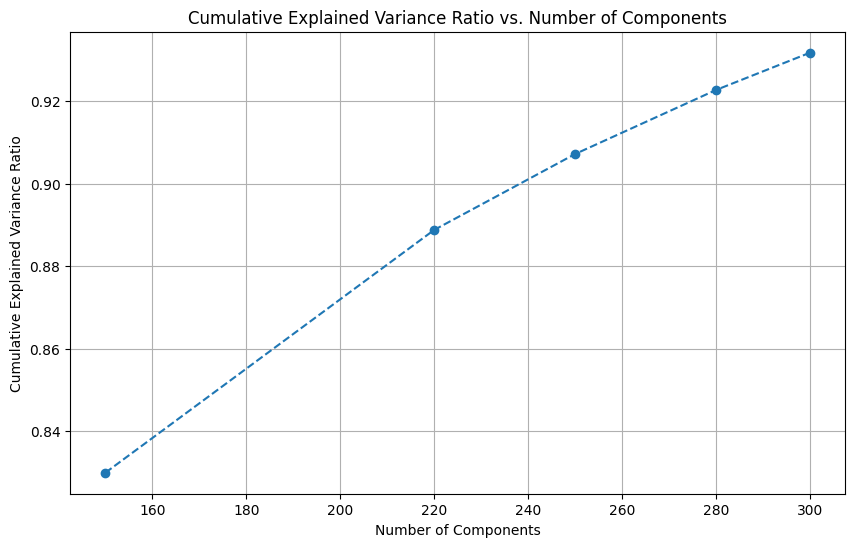


Không đạt CEVR 0.95. Chọn tạm n_components_optimal = 300


In [9]:
X_abide_np = X_abide_np[:, 2:]
cevr_list = []
component_range = [150,220,250,280,300]
if X_abide_np.shape[1] < 100:
    component_range = range(1, X_abide_np.shape[1]+1)


print("Khảo sát n_components cho PCA:")
for n in component_range:
    if n > X_abide_np.shape[1]: continue
    pca_survey = MyPCA(n_components=n)
    print(X_abide_np)
    pca_survey.fit(X_abide_np)
    cevr = pca_survey.cumulative_explained_variance_ratio_
    cevr_list.append(cevr[-1])
    print(f"n_components = {n}, Cumulative Explained Variance Ratio = {cevr[-1]:.4f}")



plt.figure(figsize=(10, 6))
plt.plot(component_range, cevr_list, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


optimal_k = -1
for i, cevr_val in enumerate(cevr_list):
    if cevr_val >= 0.95:
        optimal_k = component_range[i]
        print(f"\nChọn n_components_optimal = {optimal_k} (CEVR >= 0.95)")
        break
if optimal_k == -1:
    optimal_k = component_range[np.argmax(cevr_list)]
    print(f"\nKhông đạt CEVR 0.95. Chọn tạm n_components_optimal = {optimal_k}")



In [10]:
my_pca = MyPCA(n_components=300)
my_pca.fit(X_abide_np)
print("Explained Variance Ratio (EVR):", my_pca.explained_variance_ratio_)
print("Cumulative Explained Variance Ratio (CEVR):", my_pca.cumulative_explained_variance_ratio_)
# print("Components (eigenvectors):\n", my_pca.components_)

# Transform the data
X_transformed = my_pca.transform(X_abide_np)
print("\nTransformed data X_transformed (shape {}):\n{}".format(X_transformed.shape, X_transformed))
N_CLUSTERS = 2 # Vì có 2 nhóm: Cancer và Normal
my_kmeans = MyKMeans(n_clusters=N_CLUSTERS, random_state=42) # random_state để kết quả có thể tái lặp

# Fit K-Means trên dữ liệu đã qua PCA
cluster_labels_pred = my_kmeans.fit(X_transformed)
# cluster_labels_pred sẽ là một mảng chứa 0 hoặc 1 cho mỗi điểm dữ liệu

print("Một vài nhãn cụm dự đoán:", cluster_labels_pred[:20])

Explained Variance Ratio (EVR): [0.25402378 0.10129276 0.02185483 0.01543167 0.01361675 0.01247332
 0.01157753 0.0100715  0.00948123 0.00873577 0.00818433 0.00762103
 0.00742592 0.00735187 0.00684032 0.00670335 0.00647536 0.00619215
 0.0061373  0.00573005 0.00567928 0.00546819 0.0053934  0.00532007
 0.00516793 0.00511004 0.00503013 0.00479732 0.00469994 0.00461122
 0.00455098 0.00432987 0.00424475 0.00416178 0.00409089 0.00404499
 0.00396679 0.00391197 0.00384793 0.00372991 0.00363216 0.00359922
 0.00354219 0.00349368 0.00339915 0.00335369 0.00331952 0.00326511
 0.00316435 0.00308582 0.00306051 0.0029871  0.00297615 0.00291312
 0.0028922  0.00283223 0.00281475 0.0027346  0.00271522 0.00266206
 0.00262495 0.00258103 0.00253491 0.00251496 0.00247663 0.00242715
 0.00241999 0.0023855  0.00234631 0.00232138 0.00227347 0.0022362
 0.00221078 0.00219335 0.00215965 0.00213615 0.00212227 0.00208631
 0.0020758  0.00205809 0.0020501  0.00200522 0.001985   0.00197484
 0.00193862 0.00192615 0.001897

In [11]:
y_abide_true_numeric = np.array([1 if label == 'Cancer' else 0 for label in y_abide_true_labels])
contingency_matrix = np.zeros((N_CLUSTERS, N_CLUSTERS), dtype=int) # Giả sử nhãn gốc cũng có N_CLUSTERS giá trị duy nhất
unique_true_labels = np.unique(y_abide_true_numeric) # Sẽ là [0, 1]

for i in range(N_CLUSTERS): # Lặp qua các cluster dự đoán (0, 1)
    for j_idx, j_true_val in enumerate(unique_true_labels): # Lặp qua các nhãn thực (0, 1)
        contingency_matrix[i, j_idx] = np.sum((cluster_labels_pred == i) & (y_abide_true_numeric == j_true_val))

print("Contingency Matrix (rows: predicted clusters, cols: true labels 0, 1):")
print(contingency_matrix)
acc1 = np.mean(cluster_labels_pred == y_abide_true_numeric)
# Case 2: cluster 0 -> true 1, cluster 1 -> true 0
acc2 = np.mean((1 - cluster_labels_pred) == y_abide_true_numeric)

final_pred_labels = None
if acc1 >= acc2:
    final_pred_labels = cluster_labels_pred
    print("Mapping: Cluster 0 -> True Label 0, Cluster 1 -> True Label 1 (dựa trên accuracy)")
else:
    final_pred_labels = 1 - cluster_labels_pred
    print("Mapping: Cluster 0 -> True Label 1, Cluster 1 -> True Label 0 (dựa trên accuracy)")

def calculate_metrics(y_true, y_pred, positive_label=1): # Giả sử positive_label là 1 (Cancer)
    tp = np.sum((y_true == positive_label) & (y_pred == positive_label))
    tn = np.sum((y_true != positive_label) & (y_pred != positive_label))
    fp = np.sum((y_true != positive_label) & (y_pred == positive_label))
    fn = np.sum((y_true == positive_label) & (y_pred != positive_label))

    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0 # Còn gọi là Sensitivity
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1_score

print("\n--- Đánh giá kết quả phân cụm ---")

accuracy, precision, recall, f1_score = calculate_metrics(y_abide_true_numeric, final_pred_labels, positive_label=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (for 'Cancer'): {precision:.4f}")
print(f"Recall (for 'Cancer'): {recall:.4f}")
print(f"F1-score (for 'Cancer'): {f1_score:.4f}")



Contingency Matrix (rows: predicted clusters, cols: true labels 0, 1):
[[189 192]
 [352 271]]
Mapping: Cluster 0 -> True Label 1, Cluster 1 -> True Label 0 (dựa trên accuracy)

--- Đánh giá kết quả phân cụm ---
Accuracy: 0.5418
Precision (for 'Cancer'): 0.5039
Recall (for 'Cancer'): 0.4147
F1-score (for 'Cancer'): 0.4550
